# Анализ обученной модели

In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path

RANDOM_SEED = 0  # для воспроизводимости результатов
ROOT_PATH = Path('..')  # путь к корню проекта

# Отключаем печать некоторых предупреждений
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import dill
import pandas as pd

import uai.data
import uai.models

In [3]:
df = pd.read_csv(ROOT_PATH / 'data/interim/test_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   institution          294 non-null    object 
 1   id                   294 non-null    int64  
 2   gender               294 non-null    int64  
 3   age                  294 non-null    int64  
 4   dose                 294 non-null    float64
 5   date_analyse         294 non-null    object 
 6   prev_INR(MHO)        294 non-null    float64
 7   atrial_fibrillation  294 non-null    int64  
 8   mitral_valve         294 non-null    int64  
 9   aortal_valve         294 non-null    int64  
 10  date_diff            294 non-null    float64
 11  INR(MHO)             294 non-null    float64
 12  sample               294 non-null    int64  
 13  pass_dose            294 non-null    int64  
 14  institution_id       294 non-null    int64  
 15  diagnos              294 non-null    obj

In [11]:
user_df = pd.read_csv(ROOT_PATH / 'data/interim/test_1.csv')
user_X, _ = uai.data.to_X_y(user_df)

# загружаем пайплайн для обработки данных
with open(ROOT_PATH / 'models/datapipes/main_fittedon_train_1.dill', 'rb') as f:    
    datapipe = dill.load(f)

ready_for_model_df = datapipe.transform(user_X)

# загружаем уже настроенную модель
with open(ROOT_PATH / 'models/predictors/gama_ASH_AS_2_fittedon_train_3.dill', 'rb') as f:
    model = dill.load(f)

# предсказываем
y_pred = model.predict(ready_for_model_df)

C:\Users\victk\AppData\Local\Temp\ipykernel_20600\2214013313.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


ValueError: columns are missing: {'dose'}

In [7]:


with open(ROOT_PATH / 'models/predictors/gama_ASH_AS_2.dill', 'rb') as f:
    model = dill.load(f)

In [9]:
# Качество предсказаний на тестовой выборке

y_pred = model.predict(X_test)
scores = uai.models.calculate_metrics(y_pred, y_test)
uai.models.print_metrics(scores)

Средняя абсолютная ошибка (MAE):                         0.38
Среднеквадратичная ошибка (MSE):                         0.66
Коэффициент детерминации (R^2):                          0.73
Средняя абсолютная процентная ошибка (MAPE):            13.61%
Доля предсказаний с отклонением не более 0,5 мг:        72.26%


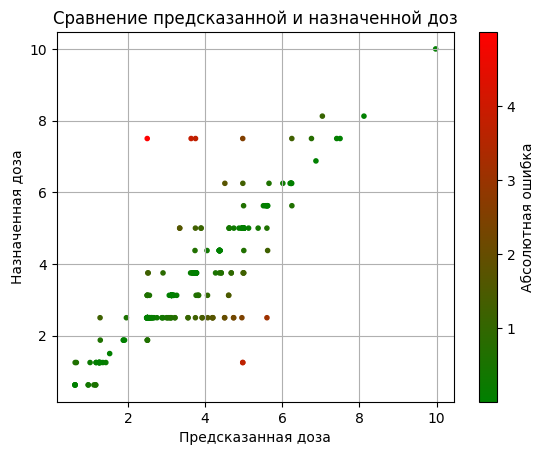

In [7]:
uai.models.plot_predictions(y_pred, y_test)

In [8]:
# Если ничего не напечаталось - то не дошли сюда, и где-то в ноутбуке ошибка
import datetime as dt
print('Ноутбук завершен:', dt.datetime.now())

Ноутбук завершен: 2023-11-07 13:57:11.058630
